In [1]:
from processing import msevn
import os
import numpy as np
import scipy
import re

msevn.configure_mpl()

In [2]:
# solo file

root = './matlab/output/experiment'

dphi = np.linspace(0, 360, 60)
dtheta0_90 = np.linspace(0, 90, 25)
dtheta90_180 = np.linspace(90, 180, 25)

eint0_90_global = np.zeros(shape=(dtheta0_90.size, dphi.size))
eint90_180_global = np.zeros(shape=(dtheta90_180.size, dphi.size))

#files = list(filter(lambda x: x.endswith('.mat'), os.listdir(root)))
#files = filter(lambda x: re.search('15deg', x), files)

fname = os.listdir(root)[1]

#wavelength = float(re.search(r'[\d\.]+(?=wav)', fname).group())

# eint0_90_20nm = msevn.mstm_est.e_int(
#         matpath=os.path.join(root, fname),
#         dphi=dphi,
#         dtheta=dtheta0_90,
#         thickness=msevn.mstm_est.thickness(21, 180, 20)
#     )

eint0_90_20nm = np.load('./sheeeeeeet.npy')

In [9]:
#np.save('./sheeeeeeet.npy', eint0_90_20nm)

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


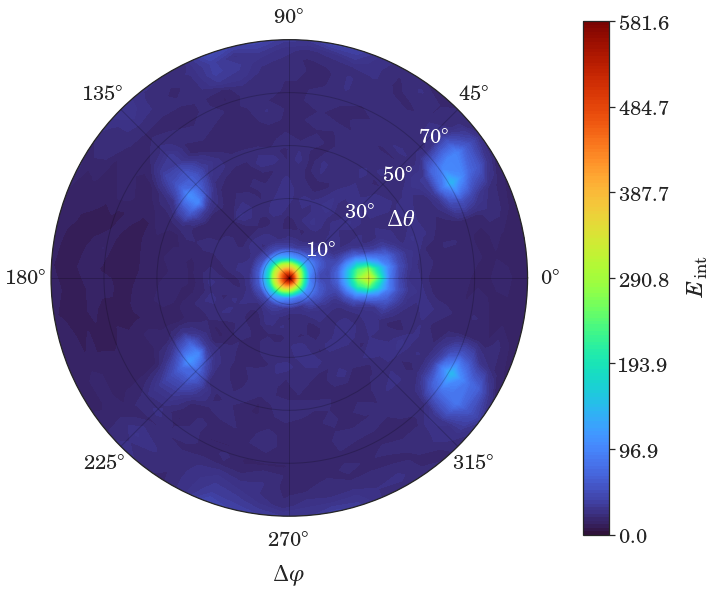

In [5]:
fig = msevn.mstm_polar_plot.e_int(eint0_90_20nm, kind='t', dtheta=dtheta0_90, dphi=dphi, symmertry=False)
#fig.savefig(f'../tex/components/img/celes/e_int_20nm_15deg_0.1nonreg.pdf', bbox_inches='tight')

In [10]:
import re

root = './matlab/output/radiusdep'
#fname = 'cylinder_15edge_249gap_50radius_0.0nonreg_1.8702m_15deg_TEpol_83wav_800bw.mat'


#dphi = np.array([0])
dphi = np.linspace(0, 180, 30)
dtheta0_90 = np.linspace(0, 90, 25)
#dtheta90_180 = np.linspace(90, 180, 25)

eint0_90_global = np.zeros(shape=(dtheta0_90.size, dphi.size))
#eint90_180_global = np.zeros(shape=(dtheta90_180.size, dphi.size))

files = filter(lambda x: x.endswith('.mat'), os.listdir(root))
#files = filter(lambda x: re.search('15deg', x), files)

eint_storage = {}
eint_storage[20] = eint0_90_20nm

#eint0_90_global = np.load('shet.npy')

for fname in files:

    #wavelength = float(re.search(r'[\d\.]+(?=wav)', fname).group())
    radius = float(re.search(r'\d+(?=radius)', fname).group())
    #theta0 = float(re.search(r'\d+(?=deg_theta0)', fname).group())

    #if radius in [30, 60]:

    eint0_90 = msevn.mstm_est.e_int(
            matpath=os.path.join(root, fname),
            dphi=dphi,
            dtheta=dtheta0_90,
            thickness=msevn.mstm_est.thickness(16, 180, 50),
            mean_mode=False
        )

    #eint0_90_global += get_rel_amp(wavelength)**2 * eint0_90
    eint_storage[radius] = eint0_90
    #eint_storage[theta0] = eint0_90

    # eint90_180 = msevn.mstm_est.e_int(
    #         matpath=os.path.join(root, fname),
    #         dphi=dphi,
    #         dtheta=dtheta90_180,
    #         thickness=msevn.mstm_est.thickness(15, 249, 50)
    #    )

    # eint90_180_global += get_rel_amp(wavelength) * eint90_180

100%|██████████| 30/30 [01:33<00:00,  3.10s/it]


In [ ]:
# plot dtheta vs theta0

sorted_storage = dict(sorted(eint_storage.items(), key=lambda x: x[0]))

datath0 = np.concatenate(list(eint_storage.values()), axis=1)

In [ ]:
list(sorted_storage.keys()), dtheta0_90

([7.0, 10.0, 14.0, 15.0, 16.0, 18.0, 20.0, 23.0, 25.0, 29.0, 33.0],
 array([ 0.  ,  3.75,  7.5 , 11.25, 15.  , 18.75, 22.5 , 26.25, 30.  ,
        33.75, 37.5 , 41.25, 45.  , 48.75, 52.5 , 56.25, 60.  , 63.75,
        67.5 , 71.25, 75.  , 78.75, 82.5 , 86.25, 90.  ]))

/tmp/ipykernel_9639/3413855926.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(cax, fraction=0.046, pad=0.1)


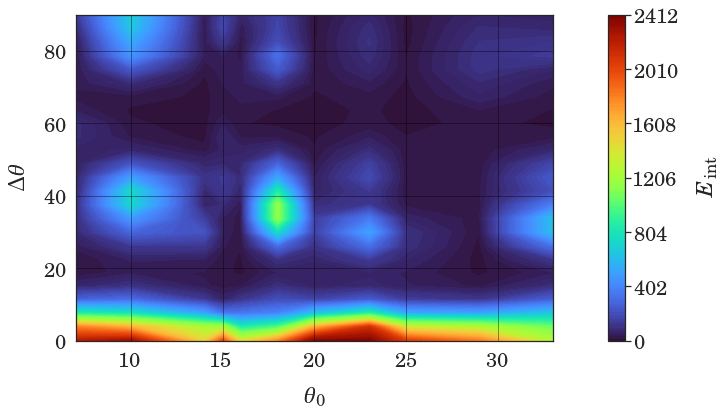

In [40]:
from matplotlib import ticker

th0mesh, dthmesh = np.meshgrid(list(sorted_storage.keys()), dtheta0_90)

fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(color='black', alpha=0.4)
cax = ax.contourf(
                th0mesh, dthmesh, 
                datath0, 
                cmap='turbo', 
                levels=np.linspace(0, datath0.max(), 150), 
                zorder=-1
            )

ax.set_xlabel(r'$\theta_0$', labelpad=15)
ax.set_ylabel(r'$\Delta \theta$', labelpad=15)

cbar = plt.colorbar(cax, fraction=0.046, pad=0.1)
cbar.set_label(r'$E_{\rm{int}}$', labelpad=15)
cbar.ax.yaxis.set_major_locator(ticker.LinearLocator(7))

for c in cax.collections:
    c.set_edgecolor("face")

#fig.savefig('../tex/components/img/celes/theta0_dtheta_dphi_phi0_0.pdf', bbox_inches='tight')

In [9]:
eint_storage[30].shape

(25, 1)

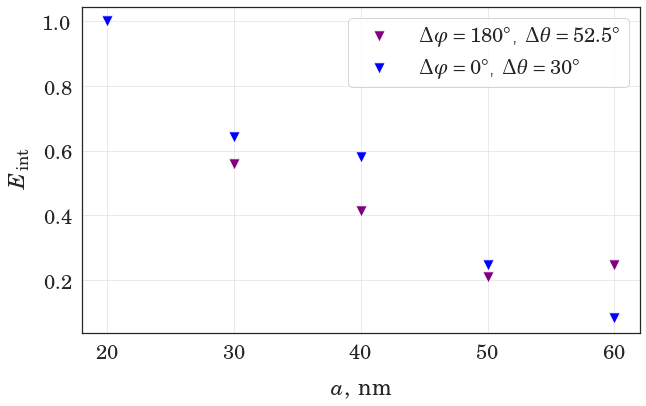

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

x = sorted(list(eint_storage.keys()))

y = [eint_storage[r][14, 29] for r in x]
y = [s / y[0] for s in y]

y2 = [eint_storage[r][8, 0] for r in x]
y2 = [s / y2[0] for s in y2]

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=x, y=y, s=130, marker='v', color='purple', label=r'$\Delta \varphi = 180^\circ$, $\Delta \theta = 52.5^\circ$')
sns.scatterplot(x=x, y=y2, s=130, marker='v', color='blue', label=r'$\Delta \varphi = 0^\circ$, $\Delta \theta = 30^\circ$')

ax.set_xlabel(r'$a,$ $\rm{nm}$', labelpad=15)
ax.set_ylabel(r'$E_{\rm{int}}$', labelpad=15)

#fig.savefig('../tex/components/img/celes/energy_vs_radius.pdf', bbox_inches='tight')

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


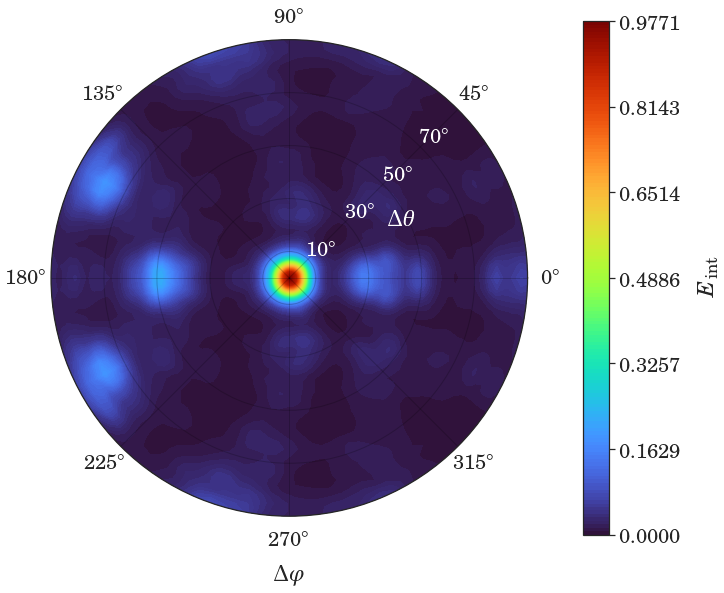

In [8]:
fig = msevn.mstm_polar_plot.e_int(eint_storage[30], kind='t', dtheta=dtheta0_90, dphi=dphi, cbarlabel=r'${E}_{\rm{int}}$')
#fig.savefig(f'../tex/components/img/celes/e_int_30nm_15deg.pdf', bbox_inches='tight')

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


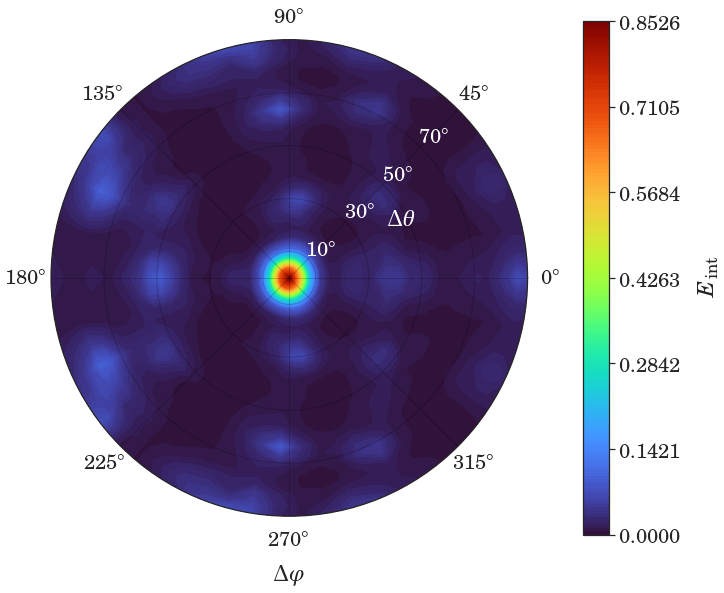

In [4]:
fig = msevn.mstm_polar_plot.e_int(eint_storage[60], kind='t', dtheta=dtheta0_90, dphi=dphi, cbarlabel=r'${E}_{\rm{int}}$')
#fig.savefig(f'../tex/components/img/celes/e_int_60nm_15deg.pdf', bbox_inches='tight')

/home/misery7100/GitLibrary/Magistracy/Article-I/computations/processing/msevn/mstm/plotting/polar.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([r'$' + str(i) + r'^{\circ}$' for i in range(0, 360, 45)])


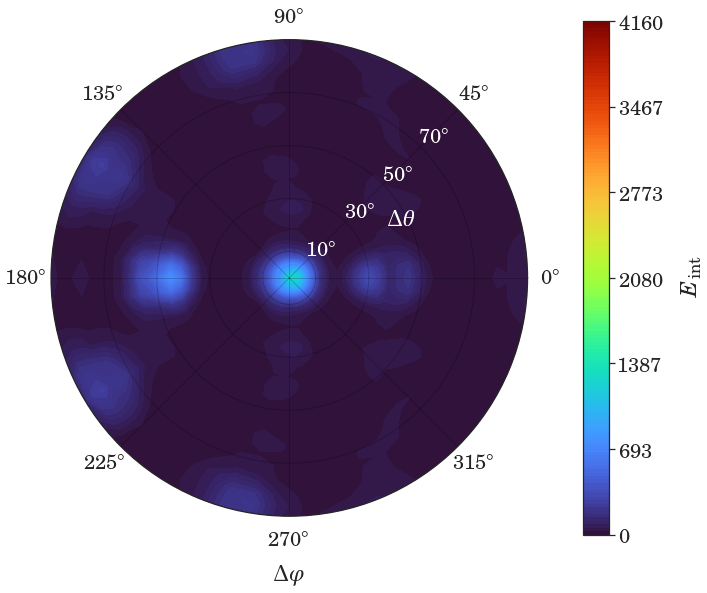

In [7]:
import matplotlib.pyplot as plt

fig = msevn.mstm_polar_plot.e_int(eint_storage[83], kind='t', dtheta=dtheta0_90, dphi=dphi, max_hardcoded=4160, no_colorbar=False)
#fig.savefig(f'../tex/components/img/celes/e_int_wavepacket10_rad_20nm_15deg.pdf', bbox_inches='tight')

#ax = plt.gca()